# 1.1 PyTorch for Computer Vision

In this note, we will address some of the basic commands that you will need from PyTorch in general and in computer vision in particular.

<!---
- [Basic PyTorch commands](#Basic-PyTorch-commands)
- [Computer vision data sets](#Computer-vision-data-sets)
- [Transforms](#Transforms)
- [Exercises](#Exercises)
-->

First, we import the required libraries. These should all be available on Google Colab.

In [1]:
import torch # PyTorch
import torchvision # Computer vision
# Data sets and transforms
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
# Other libraries
import matplotlib.pyplot as plt
import numpy as np

You can, e.g., check your PyTorch 

In [2]:
torch.__version__

'2.5.1+cu124'

## Basic PyTorch commands

PyTorch has its own objects: PyTorch tensors. All data will have to be put in this format.

In [3]:
scalar = torch.tensor(1)
vector = torch.tensor([1, 2,2.5])
matrix = torch.tensor([[[1, 2,3], [3, 4,5]],[[1, 2,3], [3, 4,5]]])

If you already have a tensor object, you can print different properties.

LF note: Matrix is row-major. Extra dimension added to the front.

In [4]:
print(matrix.ndim, matrix.shape,vector.dtype)
print(vector)
print(matrix)

3 torch.Size([2, 2, 3]) torch.float32
tensor([1.0000, 2.0000, 2.5000])
tensor([[[1, 2, 3],
         [3, 4, 5]],

        [[1, 2, 3],
         [3, 4, 5]]])


Many of the commands (such as the method creating vectors with ones in each entry) mirror the corresponding commands in numpy.

In [5]:
t0 = torch.zeros(size=(3,1))
print(t0)
t1 = torch.ones(size=(3,1))
print(t1)

tensor([[0.],
        [0.],
        [0.]])
tensor([[1.],
        [1.],
        [1.]])


Just like in numpy you can, for instance, easily perform element-wise multiplication, multiply a tensor with a scalar or determine the index of the entry with the maximum or minimum value. But not everything is the same.

In [6]:
print(10*vector)
print(vector*vector)
print(vector.argmax())
print(vector.argmin())

tensor([10., 20., 25.])
tensor([1.0000, 4.0000, 6.2500])
tensor(2)
tensor(0)


When creating so-called batches (see Lecture 1) of data in later notebooks, we will sometimes need to be able to add a dimension to a tensor. We thus keep the content of the data but add an empty dimension along the dimension dim.

In [7]:
torch.unsqueeze(vector,dim=0)

tensor([[1.0000, 2.0000, 2.5000]])

You can also turn PyTorch tensors into numpy objects

In [8]:
vector.numpy()

array([1. , 2. , 2.5], dtype=float32)

Or numpy objects into tensors.

In [9]:
array = np.arange(1,3)
torch.from_numpy(array)

tensor([1, 2])

For more basic PyTorch commands, see the exercises below.

## Computer vision data sets

In this course, we will dive into Deep Learning for computer vision, i.e., we will be working with image data. Torchvision provides a long list of datasets that are commonly used for this purpose.

In [10]:
# Available datasets
print(datasets.__all__)

('LSUN', 'LSUNClass', 'ImageFolder', 'DatasetFolder', 'FakeData', 'CocoCaptions', 'CocoDetection', 'CIFAR10', 'CIFAR100', 'EMNIST', 'FashionMNIST', 'QMNIST', 'MNIST', 'KMNIST', 'StanfordCars', 'STL10', 'SUN397', 'SVHN', 'PhotoTour', 'SEMEION', 'Omniglot', 'SBU', 'Flickr8k', 'Flickr30k', 'Flowers102', 'VOCSegmentation', 'VOCDetection', 'Cityscapes', 'ImageNet', 'Caltech101', 'Caltech256', 'CelebA', 'WIDERFace', 'SBDataset', 'VisionDataset', 'USPS', 'Kinetics', 'HMDB51', 'UCF101', 'Places365', 'Kitti', 'INaturalist', 'LFWPeople', 'LFWPairs', 'KittiFlow', 'Sintel', 'FlyingChairs', 'FlyingThings3D', 'HD1K', 'Food101', 'DTD', 'FER2013', 'GTSRB', 'CLEVRClassification', 'OxfordIIITPet', 'PCAM', 'Country211', 'FGVCAircraft', 'EuroSAT', 'RenderedSST2', 'Kitti2012Stereo', 'Kitti2015Stereo', 'CarlaStereo', 'Middlebury2014Stereo', 'CREStereo', 'FallingThingsStereo', 'SceneFlowStereo', 'SintelStereo', 'InStereo2k', 'ETH3DStereo', 'wrap_dataset_for_transforms_v2', 'Imagenette')


To dowload and import the training set from the MNIST data set, we use the command.

LF: Dataloader is doing something smart in memory management - It's effectively a pointer that load the data only when required. (c.f. especially important when you train with mini-batch).

In [11]:
trainset_mnist_0 = datasets.MNIST(root='./data', train=True, download=True)

Note that not all datasets listed above can be easily downloaded with one line of code.

We can plot individual images from this data set using matplotlib. Each image is a PyTorch tensor object.

<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


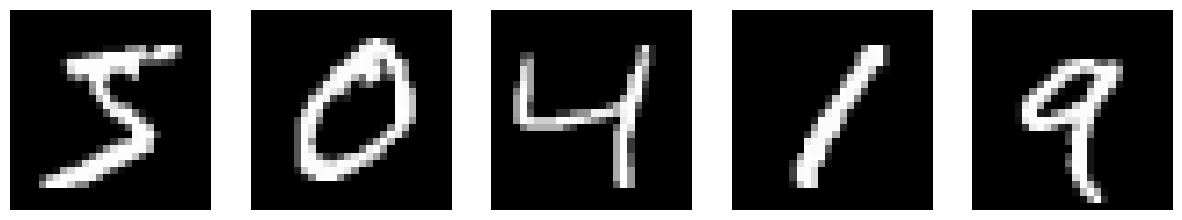

In [12]:
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i in range(5):
    img = trainset_mnist_0.data[i]
    print(type(img))
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')

In [13]:
type(trainset_mnist_0.data[1])
trainset_mnist_0.data[1].shape

torch.Size([28, 28])

Let's try a different dataset.

In [14]:
trainset_cifar10_0 = datasets.CIFAR10(root='./data', train=True, download=True)

100.0%


Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/lib64/python3.11/tarfile.py:2253: RuntimeWarning: The default behavior of tarfile extraction has been changed to disallow common exploits (including CVE-2007-4559). By default, absolute/parent paths are disallowed and some mode bits are cleared. See https://access.redhat.com/articles/7004769 for more details.
  warnings.warn(


Note the data size now include an extra dimension in the end, with 3 channels (RGB).

In [15]:
trainset_cifar10_0.data[1].shape

(32, 32, 3)

In [16]:
# Getting the mean and std before normalization
cifar10_mean_original = trainset_cifar10_0.data.mean(axis=(0,1,2))/255
cifar10_std_original  = trainset_cifar10_0.data.std(axis=(0,1,2))/255

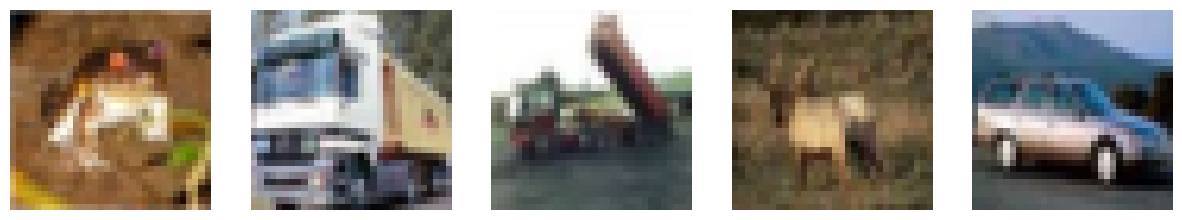

In [17]:
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = trainset_cifar10_0.data[i]
    axes[i].imshow(img)
    axes[i].axis('off')


## Transforms

Before we can pass the data to our Deep Learning model, we will often have to transform it to ensure that it has the correct format. Maybe the images are too small or too large compared to the images on which we have trained our model. It is also common practice to normalise the images before passing them to the Deep Learning model, as this approach is beneficial for convergence, stability during training and the generalisation of the network.

Let's define a transform for normalisation.

In [18]:
# MNIST is black and white. So, we only need one color channel. Other data sets have three 
means = (0.5)
stds = (0.5)

# Define the data transform including normalization
transform_mnist_0 = transforms.Compose([
    transforms.ToTensor(),  # convert to PyTorch tensor
    transforms.Normalize(mean=means, std=stds)  # normalize images
])

# In contrast, CIFAR10 provides pictures with three channels (RGB). 

means10 = (0.5,0.5,0.5)
stds10 = (0.5,0.5,0.5)

# Define the data transform including normalization
transform_cifar10_0 = transforms.Compose([
    transforms.ToTensor(),  # Converts the image to a PyTorch tensor (flip)
    transforms.Normalize(means10, stds10),  # Normalize to a range of -1 to 1 for three channels
])

If we had defined the transform before we loaded the data, we could have applied the transform to the data right away. However, we can still do so retrospectively.

In [19]:
# Apply the transform to the dataset
trainset_cifar10_0.transform = transform_cifar10_0

In [20]:
# Peek into the transformed data
trainset_cifar10_0.data[1] # The data is not yet transformed!!
# This is because the transformation is "attached" to the dataset as a rule to be run, only run during training.

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

In [21]:
# To look into the transformed data
# trainset_cifar10_0.data[1].shape
(transforms.ToTensor()(trainset_cifar10_0.data[1])).shape # Note how the dimensions are inverted (from HxWxC to CxHxW)
# transforms.Normalize(trainset_cifar10_0.data[1],mean=0.5, std=0.5) # DOESN'T WORK??

torch.Size([3, 32, 32])

In [22]:
# Also note that data, the labels are saved as "targets"
trainset_cifar10_0.targets[1]

9

We can divide the entire dataset into smaller batches, shuffle it and provide an iterable interface for retrieving batches during the training process using the DataLoader class.

In [23]:
train_loader_cifar10 = DataLoader(trainset_cifar10_0, batch_size=32, shuffle=True)

If you plot the image, you can now see that the colours are a bit off because we normalised the image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..0.9372549].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.5529412..0.85882354].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.84313726..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.96862745..0.79607844].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


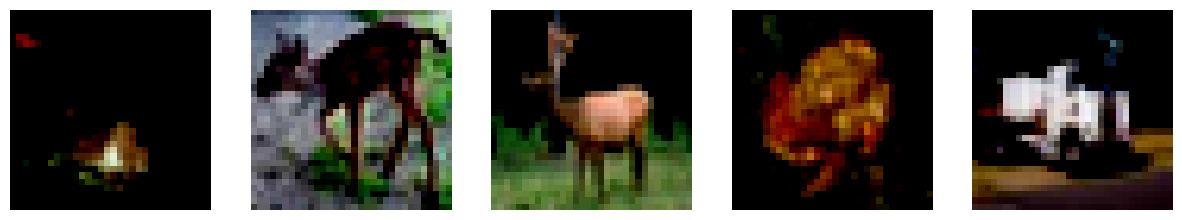

In [24]:
# Get the first batch from the data loader
dataiter = iter(train_loader_cifar10) # Now, data is in data loader
images, labels = next(dataiter) # Everytime you access "image", the data loader point to the next batch

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].permute(1,2,0) # The ToTensor has permuted the dimensions (from HxWxC to CxHxW), so we need to undo this (from CxHxW back to HxWxC)
    axes[i].imshow(img)
    axes[i].axis('off')

We can also use transforms for image augmentation, i.e., we scale, translate or rotate the images to create new images. By doing so, we reduce overfitting and introduce scale and orientation invariance.

In [25]:
transform_mnist_1 = transforms.Compose([
    transforms.RandomHorizontalFlip(), # Randomflip
    transforms.RandomRotation(degrees=(-90, 90)),  # Random rotation between -30 and 30 degrees
    transforms.ToTensor(),  # convert to PyTorch tensor (It also re-interpolates the image, and scale it to [0,1])
    transforms.Normalize(mean=means, std=stds),  # normalize images
])

# Apply the transform to the dataset
trainset_mnist_0.transform = transform_mnist_1
train_loader_mnist = DataLoader(trainset_mnist_0, batch_size=32, shuffle=True)
trainset_mnist_0.transform

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-90.0, 90.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=0.5, std=0.5)
)

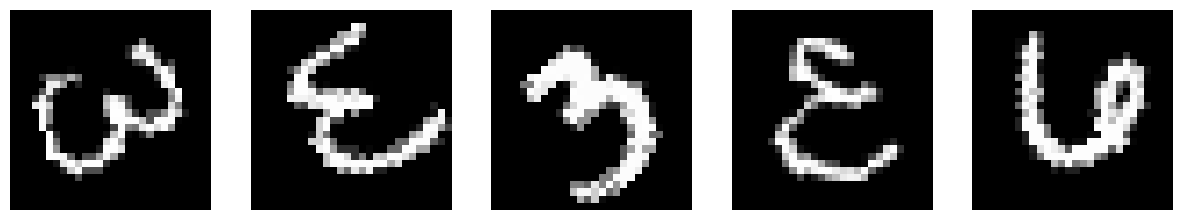

In [26]:
# Get the first batch from the data loader
dataiter = iter(train_loader_mnist)
images, labels = next(dataiter)

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].permute(1, 2, 0)
    axes[i].imshow(img, cmap="gray")
    axes[i].axis('off')

## Exercises

**Exercise 1**: Find out how to transpose, stack, reshape and permute tensors. 

In [ ]:
# Create a sample tensor
tensor = torch.tensor([[[4,62, 7], [24, 65, 86]],[[1, 2, 3], [4, 5, 6]]])

# Transpose the tensor
transposed_tensor = tensor.transpose(2, 1)
print(tensor)
print(transposed_tensor)

# Stack the tensor along a new dimension
stacked_tensor = torch.stack([tensor, tensor], dim=0)
print(stacked_tensor)

tensor([[[ 4, 62,  7],
         [24, 65, 86]],

        [[ 1,  2,  3],
         [ 4,  5,  6]]])
tensor([[[ 4, 24],
         [62, 65],
         [ 7, 86]],

        [[ 1,  4],
         [ 2,  5],
         [ 3,  6]]])
tensor([[[[ 4, 62,  7],
          [24, 65, 86]],

         [[ 1,  2,  3],
          [ 4,  5,  6]]],


        [[[ 4, 62,  7],
          [24, 65, 86]],

         [[ 1,  2,  3],
          [ 4,  5,  6]]]])


**Exercise 2**: Construct a matrix as a PyTorch tensor. Perform matrix multiplication (cf. torch.matmul())

In [33]:
# Define two matrices
matrix1 = torch.tensor([[1, 2], [3, 4]])
matrix2 = torch.tensor([[5, 6], [7, 8]])

# Perform matrix multiplication
result = torch.matmul(matrix1, matrix2)
print(result)

tensor([[19, 22],
        [43, 50]])


**Exercise 3**: Just like you can unsqueeze a tensor, you can squeeze it. Find out how and what it means.

In [27]:
dataiter = iter(train_loader_mnist)
image, labels  = next(dataiter)
# image[1].shape # [1,28,28]
torch.squeeze(image[1],dim=0).shape  # [28,28]

torch.Size([28, 28])

**Exercise 4**: Load and plot examples from another data set from torchvision.

**Exercise 5**: In cell [18] above, where we plot the CIFAR10 images after normalisation, the colours are off. Correct for this by denormalising the picture before plotting.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.25..0.75].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24607843..0.7107843].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17941177..0.5147059].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.19509804..0.7029412].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.17941177..0.5852941].


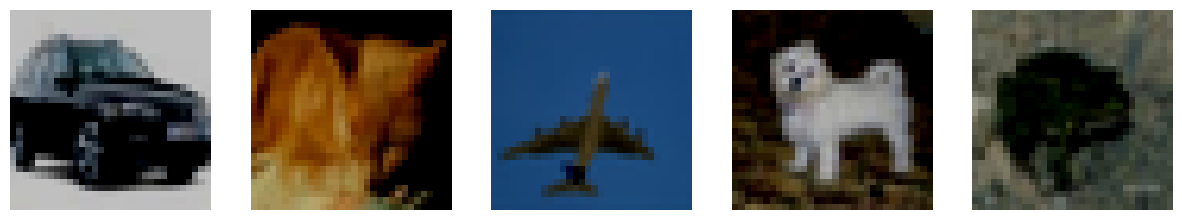

In [28]:
# Get the first batch from the data loader
dataiter = iter(train_loader_cifar10) # Now, data is in data loader
images, labels = next(dataiter) # Everytime you access "image", the data loader point to the next batch

# Define the data transform including normalization
Inversetransform_cifar10_0 = transforms.Compose([
    transforms.Normalize(-0.5, 2.0), # The original normalization was shift 0.5 down and rescale by 0.5
])
images  = Inversetransform_cifar10_0(images)
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    img = images[i].permute(1,2,0) # The ToTensor has permuted the dimensions (from HxWxC to CxHxW), so we need to undo this (from CxHxW back to HxWxC)
    axes[i].imshow(img)
    axes[i].axis('off')

**Exercise 6**: Above, we discuss a few transforms for data augmentation. What other transforms are there for this purpose? Write the corresponding code below.

100.0%

Extracting ./data/QMNIST/raw/qmnist-train-images-idx3-ubyte.gz to ./data/QMNIST/raw



100.0%

Extracting ./data/QMNIST/raw/qmnist-train-labels-idx2-int.gz to ./data/QMNIST/raw
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>


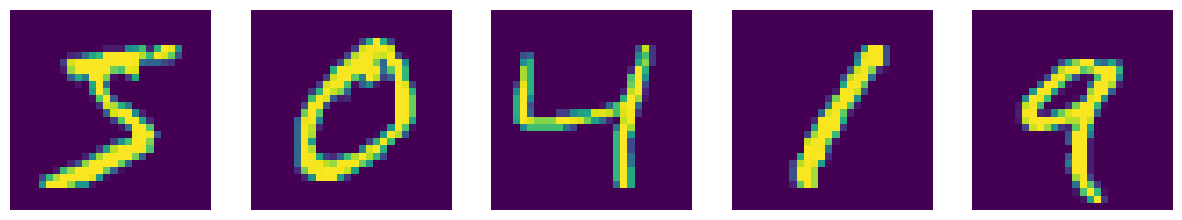

In [44]:
OtherMNIST=datasets.QMNIST(root='./data', download=True, train=True)
fig, axes = plt.subplots(1, 5, figsize=(15, 4))
for i in range(5):
    img = OtherMNIST.data[i]
    print(type(img))
    axes[i].imshow(img)
    axes[i].axis('off')